FJSSP

In [1]:
import ipympl
import os

In [2]:
FILTER_SDATA = True
path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
#path = r'/home/dhu/Downloads/fjssp'
benchmarks = os.listdir(path)

In [3]:
import math

def calculate_flexibility(machines_for_all_operations, n_machines):
    n_operations = len(machines_for_all_operations)
    machine_sum = 0

    for m in machines_for_all_operations:
        machine_sum += len(m)

    return (machine_sum/n_operations) / n_machines

def calculate_duration_variety(durations):
    counts = []
    unique_values = []
    for d in durations:
        count = 0
        for duration in d:
            if duration > 0:
                if duration not in unique_values:
                    unique_values.append(duration)
                count+=1
        counts.append(count)

    return len(unique_values) / sum(counts)

In [4]:
from benchmark_parser import BenchmarkParser
max_f = -float('inf')
max_dv = -float('inf')
max_o = -float('inf')
min_f = float('inf')
min_dv = float('inf')
min_o = float('inf')
data = dict()
f = []
o = []
dv = []
labels = []
for benchmark in benchmarks:
    if FILTER_SDATA and 'sdata' in benchmark.lower():
        continue
    parser = BenchmarkParser()
    encoding = parser.parse_benchmark(path + '/' + benchmark)
    data[benchmark] = {
        'name': benchmark,
        'n_operation': encoding.n_operations(),
        'flexibility': calculate_flexibility(encoding.get_machines_for_all_operations(), encoding.n_machines()),
        'duration_variety': calculate_duration_variety(encoding.durations())
    }
    f.append(data[benchmark]['flexibility'])
    o.append(data[benchmark]['n_operation'])
    dv.append(data[benchmark]['duration_variety'])
    labels.append(benchmark)
    if data[benchmark]['flexibility'] > max_f:
        max_f = data[benchmark]['flexibility']
    if data[benchmark]['flexibility'] < min_f:
        min_f = data[benchmark]['flexibility']
    if data[benchmark]['duration_variety'] > max_dv:
        max_dv = data[benchmark]['duration_variety']
    if data[benchmark]['duration_variety'] < min_dv:
        min_dv = data[benchmark]['duration_variety']
    if data[benchmark]['n_operation'] > max_o:
        max_o = data[benchmark]['n_operation']
    if data[benchmark]['n_operation'] < min_o:
        min_o = data[benchmark]['n_operation']

In [5]:
%matplotlib widget 
import matplotlib.pyplot as plt
def scatter_3d(f, o , dv):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(f, o, dv)
    ax.set_xlabel('Flexibility')
    ax.set_ylabel('# Operations')
    ax.set_zlabel('Duration Variety')

    plt.show()

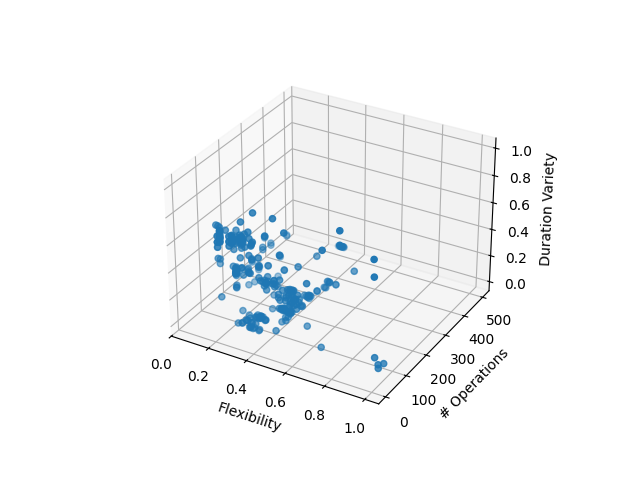

In [6]:
scatter_3d(f, o, dv)

In [7]:
min_size = 20
remove_keys = []
for key in data.keys():
    if data[key]['n_operation'] < min_size:
        remove_keys.append(key)
        print(key)
for key in remove_keys:
    data.pop(key)
print(f'Removed {len(remove_keys)} benchmarks')

Fattahi1.fjs
Fattahi10.fjs
Fattahi11.fjs
Fattahi12.fjs
Fattahi13.fjs
Fattahi2.fjs
Fattahi3.fjs
Fattahi4.fjs
Fattahi5.fjs
Fattahi6.fjs
Fattahi7.fjs
Fattahi8.fjs
Fattahi9.fjs
Kacem1.fjs
Removed 14 benchmarks


In [8]:
max_f = -float('inf')
max_dv = -float('inf')
max_o = -float('inf')
min_f = float('inf')
min_dv = float('inf')
min_o = float('inf')
f = []
o = []
dv = []
labels = []
for benchmark in data:
    f.append(data[benchmark]['flexibility'])
    o.append(data[benchmark]['n_operation'])
    dv.append(data[benchmark]['duration_variety'])
    labels.append(benchmark)
    if data[benchmark]['flexibility'] > max_f:
        max_f = data[benchmark]['flexibility']
    if data[benchmark]['flexibility'] < min_f:
        min_f = data[benchmark]['flexibility']
    if data[benchmark]['duration_variety'] > max_dv:
        max_dv = data[benchmark]['duration_variety']
    if data[benchmark]['duration_variety'] < min_dv:
        min_dv = data[benchmark]['duration_variety']
    if data[benchmark]['n_operation'] > max_o:
        max_o = data[benchmark]['n_operation']
    if data[benchmark]['n_operation'] < min_o:
        min_o = data[benchmark]['n_operation']

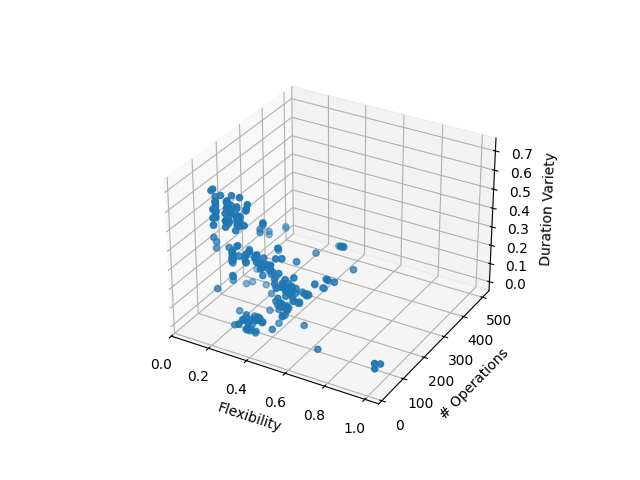

In [9]:
scatter_3d(f, o, dv)

In [10]:
f_sorted = sorted(f)
dv_sorted = sorted(dv)
o_sorted = sorted(o)
for key in data:
    benchmark = data[key]
    for i in range(len(f_sorted)):
        if benchmark['flexibility'] <= f_sorted[i] and not 'flexibility_rank' in benchmark:
            benchmark['flexibility_rank'] = i
        if benchmark['duration_variety'] <= dv_sorted[i] and not 'duration_variety_rank' in benchmark:
            benchmark['duration_variety_rank'] = i
        if benchmark['n_operation'] <= o_sorted[i] and not 'operation_rank' in benchmark:
            benchmark['operation_rank'] = i
        if 'flexibility_rank' in benchmark and 'duration_variety_rank' in benchmark and 'operation_rank' in benchmark:
            break

In [11]:
max_score = len(data) * 3
min_score = 0
mid_score = (len(data)/2) * 3

In [12]:
lowest_flexibility = sorted([data[key] for key in data], key=lambda x: x['flexibility'])
highest_flexibility = sorted([data[key] for key in data], key=lambda x: x['flexibility'], reverse=True)
lowest_duration_variety = sorted([data[key] for key in data], key=lambda x: x['duration_variety'])
highest_duration_variety = sorted([data[key] for key in data], key=lambda x: x['duration_variety'], reverse=True)
lowest_operation = sorted([data[key] for key in data], key=lambda x: x['n_operation'])
highest_operation = sorted([data[key] for key in data], key=lambda x: x['n_operation'], reverse=True)

In [13]:
equal_best_high_flexibility = [x for x in highest_flexibility if x['flexibility_rank'] == highest_flexibility[0]['flexibility_rank']]
equal_best_high_duration_variety = [x for x in highest_duration_variety if x['duration_variety_rank'] == highest_flexibility[0]['duration_variety_rank']]
equal_best_high_operation = [x for x in highest_operation if x['operation_rank'] == highest_flexibility[0]['operation_rank']]

equal_best_low_flexibility = [x for x in lowest_flexibility if x['flexibility_rank'] == 0]
equal_best_low_duration_variety = [x for x in lowest_duration_variety if x['duration_variety_rank'] == 0]
equal_best_low_operation = [x for x in lowest_operation if x['operation_rank'] == 0]

In [14]:
equal_best_low_duration_variety

[{'name': 'Behnke58.fjs',
  'n_operation': 500,
  'flexibility': 0.3249333333333333,
  'duration_variety': 0.002154288059089044,
  'duration_variety_rank': 0,
  'flexibility_rank': 198,
  'operation_rank': 307}]

In [15]:
equal_best_low_flexibility[-1]

{'name': 'ChambersBarnes21.fjs',
 'n_operation': 225,
 'flexibility': 0.06666666666666667,
 'duration_variety': 0.3411764705882353,
 'flexibility_rank': 0,
 'duration_variety_rank': 223,
 'operation_rank': 228}

In [16]:
import numpy as np

mean_f = np.mean(f)
mean_dv = np.mean(dv)
mean_o = np.mean(o)

median_f = np.median(f)
median_dv = np.median(dv)
median_o = np.median(o)

std_f = np.std(f)
std_dv = np.std(dv)
std_o = np.std(o)

In [17]:
mean_dv

0.24331106399390032

In [18]:
n_benchmarks = len(data)
max_f = np.max(f)
min_f = np.min(f)
max_dv = np.max(dv)
min_dv = np.min(dv)
max_o = np.max(o)
min_o = np.max(o)
def norm(value, max, min):
    return value/max
    diff = max - min
    return (value-min)/diff

def get_squared_distance(data, category, averages : list[float] = None, maxes : list = None):
    f_distance = 0
    dv_distance = 0
    o_distance = 0
    if category[0] == 'h': # flexibility
        f_distance = math.pow(n_benchmarks - data['flexibility_rank'], 2) if not maxes else math.pow(maxes[0] - data['flexibility_rank'], 2)
    elif category[0] == 'm':
        f_distance = math.pow((n_benchmarks/2) - data['flexibility_rank'], 2) if not averages else math.pow(averages[0] - data['flexibility_rank'], 2)
    else:
        f_distance = math.pow(data['flexibility_rank'], 2)
    if category[1] == 'h': # duration variety
        dv_distance = math.pow(n_benchmarks - data['duration_variety_rank'], 2)  if not maxes else math.pow(maxes[1] - data['duration_variety_rank'], 2)
    elif category[1] == 'm':
        dv_distance = math.pow((n_benchmarks/2) - data['duration_variety_rank'], 2) if not averages else math.pow(averages[1] - data['duration_variety_rank'], 2)
    else:
        dv_distance = math.pow(data['duration_variety_rank'], 2)
    if category[2] == 'h': # operations
        o_distance = math.pow(n_benchmarks - data['operation_rank'], 2)  if not maxes else math.pow(maxes[2] - data['operation_rank'], 2)
    elif category[2] == 'm':
        o_distance = math.pow((n_benchmarks/2) - data['operation_rank'], 2) if not averages else math.pow(averages[2] - data['operation_rank'], 2)
    else:
        o_distance = math.pow(data['operation_rank'], 2)
    return f_distance + dv_distance + o_distance


def get_squared_distance_norm(data, category, averages : list[float] = None):
    f_distance = 0
    dv_distance = 0
    o_distance = 0
    f_norm = norm(max_f, max_f, min_f)
    dv_norm = norm(max_dv, max_dv, min_dv)
    o_norm = norm(max_o, max_o, min_o)
    f_value = norm(data['flexibility'], max_f, min_f)
    dv_value = norm(data['duration_variety'], max_dv, min_dv)
    o_value = norm(data['n_operation'], max_o, min_o)
    if category[0] == 'h': # flexibility
        f_distance = math.pow(1.0 - f_value, 2)
    elif category[0] == 'm':
        #f_distance = math.pow(0.5 - f_value, 2)
        f_distance = math.pow(((max_f+min_f)/2) - f_value, 2) if not averages else math.pow(averages[0] - f_value, 2)
    else:
        f_distance = math.pow(f_value, 2)
    if category[1] == 'h': # duration variety
        dv_distance = math.pow(1.0 - dv_value, 2)
    elif category[1] == 'm':
        dv_distance = math.pow(((max_dv+min_dv)/2) - dv_value, 2) if not averages else math.pow(averages[1] - f_value, 2)
    else:
        dv_distance = math.pow(dv_value, 2)
    if category[2] == 'h': # operations
        o_distance = math.pow(1.0 - o_value, 2)
    elif category[2] == 'm':
        o_distance = math.pow(((max_o+min_o)/2) - o_value, 2) if not averages else math.pow(averages[2] - f_value, 2)
    else:
        o_distance = math.pow(o_value, 2)
    return f_distance + dv_distance + o_distance

def get_average(data, category):
    avg_data = [data[benchmark][category] for benchmark in data]
    return sum(avg_data) / len(avg_data)

def get_average_norm(data, category):
    avg = 0
    avg_data = [data[benchmark][category] for benchmark in data]
    for benchmark in avg_data:
        avg += norm(benchmark, max(avg_data), min(avg_data))
    return avg / len(data)

In [19]:
def find_balanced(data, category, use_averages = True, use_max = True):
    result = []
    averages = None if not use_averages else [get_average(data, c) for c in ['flexibility_rank', 'duration_variety_rank', 'operation_rank']]
    maxes = None if not use_max else [max([data[x]['flexibility_rank'] for x in data]), max(data[x]['duration_variety_rank'] for x in data), max(data[x]['operation_rank'] for x in data)]
    for key in data:
        benchmark = data[key]
        result.append([key, get_squared_distance(benchmark, category, averages, maxes)])
    return sorted(result, key=lambda x: x[1])

def find_balanced_norm(data, category):
    result = []
    averages = [get_average_norm(data, c) for c in ['flexibility', 'duration_variety', 'n_operation']]
    for key in data:
        benchmark = data[key]
        result.append([key, get_squared_distance_norm(benchmark, category, averages)])
    return sorted(result, key=lambda x: x[1])

In [20]:
categories = [
    'hhh',
    'hhm',
    'hhl',
    'hmh',
    'hmm',
    'hml',
    'hlh',
    'hlm',
    'hll',
    'mhh',
    'mhm',
    'mhl',
    'mmh',
    'mmm',
    'mml',
    'mlh',
    'mlm',
    'mll',
    'lhh',
    'lhm',
    'lhl',
    'lmh',
    'lmm',
    'lml',
    'llh',
    'llm',
    'lll'
    ]
results = [find_balanced(data, category) for category in categories]
results_best = []
for i in range(len(results)):
    for j in range(len(results[i])):
        if results[i][j] not in results_best:
            results_best.append(results[i][j])
            break
#results_best = [result[0] for result in results]
both = zip(results_best, categories)

In [21]:
%matplotlib widget 
import matplotlib.pyplot as plt
def scatter_3d_highlight(data, highlight, interest = [], nolegend:bool=False):#f, o , dv, h_f, h_o, h_dv):
    f = []
    o = []
    dv = []
    f_h = []
    o_h = []
    dv_h = []
    f_i = []
    o_i = []
    dv_i = []
    labels = []
    for benchmark in data:
        if benchmark in highlight or benchmark in interest:
            if benchmark in highlight:
                f_h.append(data[benchmark]['flexibility'])
                o_h.append(data[benchmark]['n_operation'])
                dv_h.append(data[benchmark]['duration_variety'])
            if benchmark in interest:
                f_i.append(data[benchmark]['flexibility'])
                o_i.append(data[benchmark]['n_operation'])
                dv_i.append(data[benchmark]['duration_variety'])
        else:
            f.append(data[benchmark]['flexibility'])
            o.append(data[benchmark]['n_operation'])
            dv.append(data[benchmark]['duration_variety'])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(f, o, dv, alpha=0.1, color='blue')
    if len(interest) > 0:
        ax.scatter(f_i, o_i, dv_i, label='Interested', marker='^', alpha=1.0, color='orange')
    if len(highlight) > 0:
        ax.scatter(f_h, o_h, dv_h, label='Selected', marker='*', alpha=1.0, color='red')
    ax.set_xlabel(r'$\beta$')#Flexibility')
    ax.set_ylabel(r'$\mathrm{N}$')
    ax.set_zlabel(r'$dv$')
    if not nolegend:
        plt.legend()
    plt.show()

In [22]:
selected_names = []
doubles = 0
i = 0
for result, category in both:
    #print(f'{category}: {result}')
    replaced = False
    if result[0] in selected_names:
        # select different one
        a = 1
        b = 1
        j = selected_names.index(result[0])
        while not replaced:
            if results[i][a][1] - results[i][a-1][1] < results[j][b][1] - results[j][b-1][1]:
                replaced = True
                selected_names.append(results[i][a][0])
            elif results[i][a][1] - results[i][a-1][1] > results[j][b][1] - results[j][b-1][1]:
                replaced = True
                selected_names.append(results[i][b][0])
            a+=1
            b+=1
    if not replaced:
        if result[0] in selected_names:
            doubles += 1
        selected_names.append(result[0])
    i+=1
    print(f'{category}: {selected_names[-1]}')
print(f'{doubles} benchmarks occur more than once')

hhh: DPpaulli6.fjs
hhm: HurinkRdata50.fjs
hhl: HurinkVdata50.fjs
hmh: DPpaulli9.fjs
hmm: HurinkVdata3.fjs
hml: HurinkVdata4.fjs
hlh: DPpaulli18.fjs
hlm: BrandimarteMk2.fjs
hll: Kacem3.fjs
mhh: DPpaulli1.fjs
mhm: HurinkEdata18.fjs
mhl: HurinkEdata8.fjs
mmh: DPpaulli8.fjs
mmm: HurinkRdata25.fjs
mml: HurinkRdata1.fjs
mlh: Behnke59.fjs
mlm: Behnke49.fjs
mll: Behnke42.fjs
lhh: ChambersBarnes15.fjs
lhm: HurinkEdata23.fjs
lhl: HurinkEdata55.fjs
lmh: HurinkEdata38.fjs
lmm: HurinkEdata63.fjs
lml: HurinkEdata1.fjs
llh: BrandimarteMk14.fjs
llm: BrandimarteMk12.fjs
lll: Behnke24.fjs
0 benchmarks occur more than once


In [23]:
len(results_best)

27

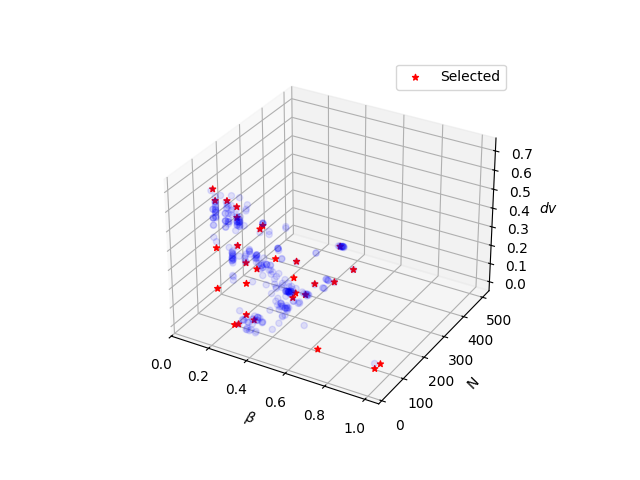

In [24]:
selected_names.extend(['Fattahi20.fjs', 'Kacem4.fjs', 'HurinkVdata30.fjs'])
scatter_3d_highlight(data, selected_names)

In [25]:
print(selected_names)

['DPpaulli6.fjs', 'HurinkRdata50.fjs', 'HurinkVdata50.fjs', 'DPpaulli9.fjs', 'HurinkVdata3.fjs', 'HurinkVdata4.fjs', 'DPpaulli18.fjs', 'BrandimarteMk2.fjs', 'Kacem3.fjs', 'DPpaulli1.fjs', 'HurinkEdata18.fjs', 'HurinkEdata8.fjs', 'DPpaulli8.fjs', 'HurinkRdata25.fjs', 'HurinkRdata1.fjs', 'Behnke59.fjs', 'Behnke49.fjs', 'Behnke42.fjs', 'ChambersBarnes15.fjs', 'HurinkEdata23.fjs', 'HurinkEdata55.fjs', 'HurinkEdata38.fjs', 'HurinkEdata63.fjs', 'HurinkEdata1.fjs', 'BrandimarteMk14.fjs', 'BrandimarteMk12.fjs', 'Behnke24.fjs', 'Fattahi20.fjs', 'Kacem4.fjs', 'HurinkVdata30.fjs']


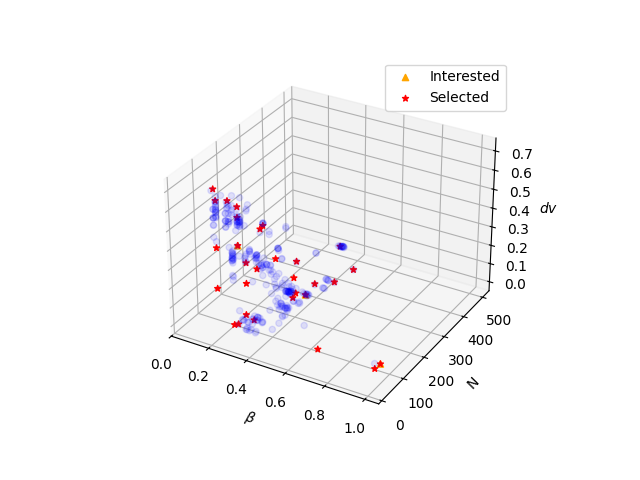

In [26]:
scatter_3d_highlight(data, selected_names, ['Fattahi20.fjs', 'Kacem4.fjs', 'HurinkVdata30.fjs'])

In [27]:
results = [find_balanced_norm(data, category) for category in categories]
results_best = []
for i in range(len(results)):
    for j in range(len(results[i])):
        if results[i][j] not in results_best:
            results_best.append(results[i][j])
            break
#results_best = [result[0] for result in results]
both = zip(results_best, categories)

In [28]:
selected_names = []
doubles = 0
for result, category in both:
    print(f'{category}: {result}')
    if result[0] in selected_names:
        doubles += 1
    selected_names.append(result[0])
print(f'{doubles} benchmarks occur more than once')

hhh: ['DPpaulli15.fjs', 1.1725635961117078]
hhm: ['Fattahi14.fjs', 0.3870196688613693]
hhl: ['Fattahi14.fjs', 0.3849839546485261]
hmh: ['DPpaulli15.fjs', 0.3254216205049022]
hmm: ['HurinkVdata49.fjs', 0.29957167946819996]
hml: ['BrandimarteMk2.fjs', 0.23120617136554236]
hlh: ['DPpaulli18.fjs', 0.3036488490963945]
hlm: ['BrandimarteMk2.fjs', 0.23409112564397797]
hll: ['Kacem3.fjs', 0.010655999999999999]
mhh: ['HurinkEdata35.fjs', 0.5701837986222336]
mhm: ['HurinkEdata50.fjs', 0.0008169278917327133]
mhl: ['Fattahi15.fjs', 0.009007530987482047]
mmh: ['Behnke38.fjs', 0.0010149801820563558]
mmm: ['Behnke26.fjs', 0.0010164682302772825]
mml: ['Fattahi17.fjs', 0.006923313914267797]
mlh: ['Behnke60.fjs', 1.320743691255283e-05]
mlm: ['Behnke56.fjs', 0.00029451119237745475]
mll: ['Behnke43.fjs', 0.01159311677580889]
lhh: ['ChambersBarnes15.fjs', 0.5495006944444445]
lhm: ['HurinkEdata55.fjs', 0.05126489433820951]
lhl: ['HurinkEdata55.fjs', 0.038304543664572935]
lmh: ['Behnke60.fjs', 0.088676868314

In [29]:
len(selected_names)

27

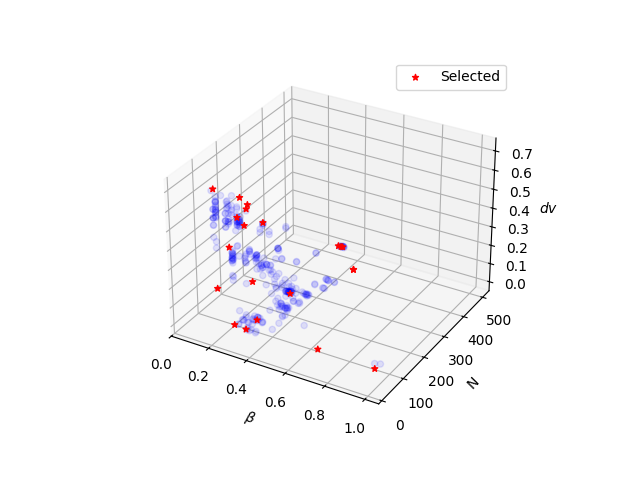

In [30]:
scatter_3d_highlight(data, selected_names)

In [31]:
data['Behnke16.fjs']

{'name': 'Behnke16.fjs',
 'n_operation': 500,
 'flexibility': 0.3236,
 'duration_variety': 0.0064894932014833125,
 'duration_variety_rank': 15,
 'flexibility_rank': 196,
 'operation_rank': 307}

In [32]:
selected_names

['DPpaulli15.fjs',
 'Fattahi14.fjs',
 'Fattahi14.fjs',
 'DPpaulli15.fjs',
 'HurinkVdata49.fjs',
 'BrandimarteMk2.fjs',
 'DPpaulli18.fjs',
 'BrandimarteMk2.fjs',
 'Kacem3.fjs',
 'HurinkEdata35.fjs',
 'HurinkEdata50.fjs',
 'Fattahi15.fjs',
 'Behnke38.fjs',
 'Behnke26.fjs',
 'Fattahi17.fjs',
 'Behnke60.fjs',
 'Behnke56.fjs',
 'Behnke43.fjs',
 'ChambersBarnes15.fjs',
 'HurinkEdata55.fjs',
 'HurinkEdata55.fjs',
 'Behnke60.fjs',
 'HurinkRdata54.fjs',
 'HurinkEdata1.fjs',
 'Behnke60.fjs',
 'BrandimarteMk8.fjs',
 'Behnke42.fjs']

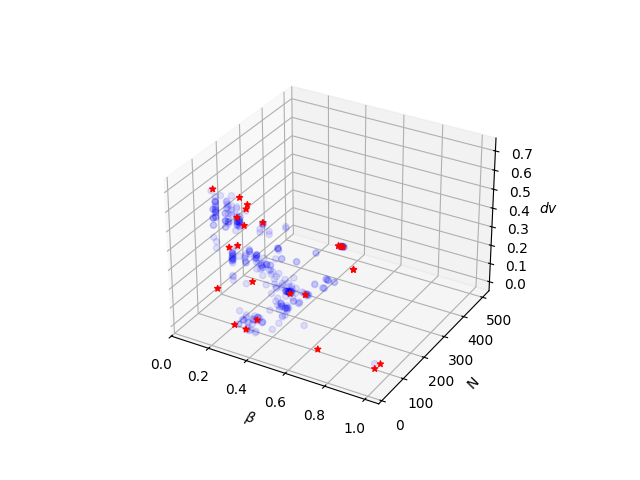

In [33]:
selected_names.extend(['Fattahi20.fjs', 'Kacem4.fjs', 'HurinkVdata30.fjs'])
scatter_3d_highlight(data, selected_names, nolegend=True)

FJSSP - WF

In [34]:
import os
path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks_with_workers'
sources = os.listdir(path)